In [1]:
import time
from datetime import date
import pandas as pd
import os
import glob
import pycytominer
import sys
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import correlation
import re
import gc

In [2]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/notebooks/CBE_utils.py'>

In [3]:
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/new_output_files/"
output_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/new_result_files/"

annotation_dir = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/annotation_files/"

In [4]:
# load normalized data
pattern = "[A-Z][0-9][0-9][0-9][0-9]_R[1-4]_mad_robustize.csv"
files = glob.glob(input_path + os.sep + '*' + os.sep + os.sep + '*' + os.sep + pattern, recursive=True)

In [6]:
# TODO: needs to change in the future
# TODO: process only what is not processed yet
Data = []

for file in files:
    
    filename = os.path.basename(file)
    
    try:
        
        Data_Temp = pd.read_csv(file)
        row_count = Data_Temp.shape[0]
        
        print(f"File: {filename} has {row_count} rows")
        
        Data.append(Data_Temp)
            
    except Exception as e:
        
        print(f"Error reading file {filename}: {e}")
        
        
### concat all files together
Data_aggregated = pd.concat(Data)
Data_aggregated = Data_aggregated.reset_index(drop = True)

print("Aggregated Data has shape ", Data_aggregated.shape)

File: C1231_R1_mad_robustize.csv has 384 rows
File: C1241_R1_mad_robustize.csv has 384 rows
File: C1230_R3_mad_robustize.csv has 384 rows
File: C1230_R4_mad_robustize.csv has 384 rows
File: C1231_R4_mad_robustize.csv has 384 rows
File: C1241_R2_mad_robustize.csv has 384 rows
File: C1230_R2_mad_robustize.csv has 384 rows
File: C1231_R2_mad_robustize.csv has 384 rows
File: C1241_R3_mad_robustize.csv has 384 rows
File: C1230_R1_mad_robustize.csv has 384 rows
File: C1231_R3_mad_robustize.csv has 384 rows
File: C1162_R4_mad_robustize.csv has 384 rows
File: C1175_R1_mad_robustize.csv has 384 rows
File: C1160_R2_mad_robustize.csv has 384 rows
File: C1160_R3_mad_robustize.csv has 384 rows
File: C1165_R2_mad_robustize.csv has 384 rows
File: C1176_R1_mad_robustize.csv has 384 rows
File: C1167_R1_mad_robustize.csv has 384 rows
File: C1166_R1_mad_robustize.csv has 384 rows
File: C1158_R4_mad_robustize.csv has 384 rows
File: C1158_R2_mad_robustize.csv has 384 rows
File: C1170_R1_mad_robustize.csv h


# Comparison over plates

In [ ]:
# TODO: Correlation of pos. & neg. controls over time
# TODO: Compute consensus per normalized plate for pos. controls
# TODO: Implement consensus of first plates of specific source
# TODO: Then with an external control from the bioactives

In [ ]:
# TODO: Per batch create internal correlations over plates
# TODO: Create reference point for pos. controls and compare plates to this

In [11]:
Data_aggregated.head()

,Metadata_Well,Metadata_instrument,Metadata_imaging_time,Metadata_source,Metadata_imaging_timezone,Metadata_Batch,Metadata_Well_randomized,Metadata_plate_name,Metadata_Plate,Metadata_RoughID,...,Cyto_Texture_Variance_Mito_10_02_256,Cyto_Texture_Variance_Mito_10_03_256,Cyto_Texture_Variance_Mito_3_00_256,Cyto_Texture_Variance_Mito_3_01_256,Cyto_Texture_Variance_Mito_3_02_256,Cyto_Texture_Variance_Mito_3_03_256,Cyto_Texture_Variance_Mito_5_00_256,Cyto_Texture_Variance_Mito_5_01_256,Cyto_Texture_Variance_Mito_5_02_256,Cyto_Texture_Variance_Mito_5_03_256
0,O02,CV8000,12:02:30,IMTM,200,HepG2_10uM,A01,C1231,C1231R1,EOS_cpd,...,-0.388569,-0.397480,-0.337381,-0.377193,-0.220344,-0.300281,-0.445350,-0.339305,-0.324083,-0.251298
1,K17,CV8000,12:02:30,IMTM,200,HepG2_10uM,A02,C1231,C1231R1,EOS_cpd,...,-1.846548,-1.797749,-1.870155,-2.100688,-1.731961,-1.689617,-1.989911,-1.850223,-1.785348,-1.653460
2,I19,CV8000,12:02:30,IMTM,200,HepG2_10uM,A03,C1231,C1231R1,EOS_cpd,...,-1.222520,-1.225155,-1.187286,-1.342566,-1.066288,-1.090041,-1.269058,-1.270187,-1.118566,-1.117101
3,B09,CV8000,12:02:30,IMTM,200,HepG2_10uM,A04,C1231,C1231R1,EOS_cpd,...,-1.274747,-1.309010,-1.318618,-1.404711,-1.210333,-1.170232,-1.347972,-1.327596,-1.237409,-1.137469
4,N10,CV8000,12:02:30,IMTM,200,HepG2_10uM,A05,C1231,C1231R1,EOS_cpd,...,-0.256909,-0.259292,-0.174461,-0.214816,-0.241352,-0.162724,-0.293659,-0.256376,-0.244783,-0.154303


In [88]:
FMP_Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == 'FMP']

In [89]:
# Compute the mean profiles for pos. controls put into new table
FMP_pos_ctrl = FMP_Data_aggregated[FMP_Data_aggregated['Metadata_RoughID'].isin(['Tetrandrine','Nocodazole'])]

######
### helper functions extracts metadata columns and define feature columns
FMP_pos_ctrl_features_columns = CBE.get_feature_vector(FMP_pos_ctrl)

Meta_Features_HepG2 = set(FMP_pos_ctrl.columns) - set(FMP_pos_ctrl_features_columns)
Meta_Features_HepG2

FMP_pos_ctrl_mean = FMP_pos_ctrl.groupby(['Metadata_imaging_date',
                                          'Metadata_imaging_time',
                                         'Metadata_Plate',
                                         'Metadata_plate_map_name',
                                         'Metadata_plate_name',
                                         'Metadata_replicate_number',
                                         'Metadata_source',
                                         'Metadata_user',
                                         'Metadata_RoughID'])[FMP_pos_ctrl_features_columns].mean().reset_index()

In [90]:
FMP_per_date = FMP_pos_ctrl_mean.loc[FMP_pos_ctrl_mean["Metadata_imaging_date"] == '2024-06-05'] 

FMP_per_date_noco = FMP_per_date.loc[FMP_per_date['Metadata_RoughID'] == 'Nocodazole']

In [91]:
columns_to_drop = [
    'Metadata_imaging_date',
    'Metadata_imaging_time',
    'Metadata_Plate',
    'Metadata_plate_name',
    'Metadata_replicate_number',
    'Metadata_source',
    'Metadata_user',
    'Metadata_RoughID']

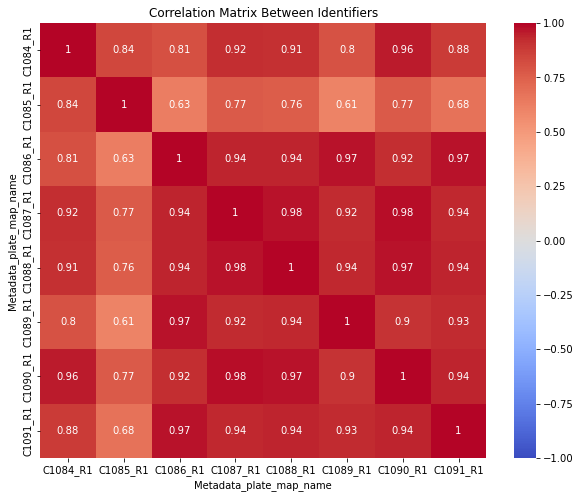

In [103]:
FMP_per_date_noco_2 = FMP_per_date_noco.drop(columns_to_drop, axis=1)
testCorr  = FMP_per_date_noco_2.set_index('Metadata_plate_map_name')
correlation_matrix = testCorr.T.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Between Identifiers')
plt.show()

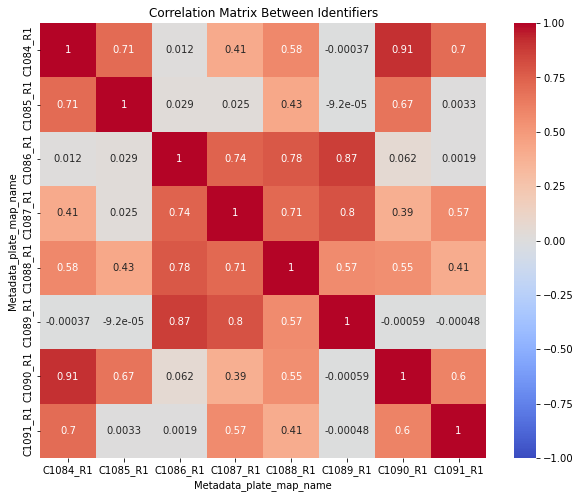

In [104]:
FMP_per_date_tet = FMP_per_date.loc[FMP_per_date['Metadata_RoughID'] == 'Tetrandrine']


FMP_per_date_tet_2 = FMP_per_date_tet.drop(columns_to_drop, axis=1)
tet_test  = FMP_per_date_tet_2.set_index('Metadata_plate_map_name')
correlation_matrix = tet_test.T.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Between Identifiers')
plt.show()

In [ ]:
# TODO: compute correlation per Metadata_plate_map_name

# Correlation to reference

In [ ]:
# TODO: correlations of all plates to reference profile

In [126]:
# These two plates have good per well agreement for Tet and Noco
FMP_ref_plate = ['C1088_R1', 'C1084_R1']

FMP_ref_plate_profiles = FMP_pos_ctrl_mean[FMP_pos_ctrl_mean['Metadata_plate_map_name'].isin(ref_plate)]

FMP_ref_plate_profiles_mean = FMP_ref_plate_profiles.groupby(['Metadata_RoughID'])[FMP_pos_ctrl_features_columns].mean().reset_index()

FMP_ref_plate_profiles_mean_features = FMP_ref_plate_profiles_mean .loc[FMP_pos_ctrl_mean['Metadata_RoughID'] == 'Nocodazole'][FMP_pos_ctrl_features_columns]

In [137]:
FMP_pos_ctrl_mean_noco = FMP_pos_ctrl_mean.loc[FMP_pos_ctrl_mean['Metadata_RoughID'] == 'Nocodazole']
FMP_pos_ctrl_mean_noco

,Metadata_imaging_date,Metadata_imaging_time,Metadata_Plate,Metadata_plate_map_name,Metadata_plate_name,Metadata_replicate_number,Metadata_source,Metadata_user,Metadata_RoughID,Nuc_AreaShape_Area,...,Cyto_Texture_Variance_Mito_10_02_256,Cyto_Texture_Variance_Mito_10_03_256,Cyto_Texture_Variance_Mito_3_00_256,Cyto_Texture_Variance_Mito_3_01_256,Cyto_Texture_Variance_Mito_3_02_256,Cyto_Texture_Variance_Mito_3_03_256,Cyto_Texture_Variance_Mito_5_00_256,Cyto_Texture_Variance_Mito_5_01_256,Cyto_Texture_Variance_Mito_5_02_256,Cyto_Texture_Variance_Mito_5_03_256
0,2024-06-05,13:34:51,C1084R1,C1084_R1,C1084,R1,FMP,Christopher,Nocodazole,21.342815,...,-1.653115,-1.613529,-1.854954,-1.788291,-1.861749,-1.743708,-1.813545,-1.663122,-1.823867,-1.750202
2,2024-06-05,14:59:15,C1085R1,C1085_R1,C1085,R1,FMP,Christopher,Nocodazole,12.815324,...,-2.348003,-2.122664,-2.376042,-2.400208,-2.430195,-2.399518,-2.445845,-2.444045,-2.557172,-2.507221
4,2024-06-05,16:23:22,C1086R1,C1086_R1,C1086,R1,FMP,Christopher,Nocodazole,9.828294,...,0.249361,0.396635,0.140453,0.144727,0.092766,0.131409,0.058872,0.099435,0.111969,0.099887
6,2024-06-05,17:46:45,C1087R1,C1087_R1,C1087,R1,FMP,Christopher,Nocodazole,19.163473,...,-0.580312,-0.348535,-0.652642,-0.661139,-0.692173,-0.550798,-0.689934,-0.749040,-0.728245,-0.541762
8,2024-06-05,19:11:38,C1088R1,C1088_R1,C1088,R1,FMP,Christopher,Nocodazole,9.274248,...,-1.551361,-1.275506,-1.594576,-1.504581,-1.734153,-1.948082,-1.662218,-1.574416,-1.626835,-1.713494
10,2024-06-05,20:36:04,C1089R1,C1089_R1,C1089,R1,FMP,Christopher,Nocodazole,9.555286,...,-0.581828,-0.435081,-0.856265,-0.809278,-0.831265,-0.903871,-0.784390,-0.765927,-0.696430,-0.748418
12,2024-06-05,22:00:07,C1090R1,C1090_R1,C1090,R1,FMP,Christopher,Nocodazole,12.421871,...,-0.246295,-0.082918,-0.352482,-0.348778,-0.340486,-0.323498,-0.337993,-0.281214,-0.308407,-0.241575
14,2024-06-05,23:24:32,C1091R1,C1091_R1,C1091,R1,FMP,Christopher,Nocodazole,9.218040,...,-0.698701,-0.518741,-1.045257,-1.076785,-0.788575,-0.857105,-0.748940,-0.753820,-0.847440,-0.622644
16,2024-06-06,00:48:58,C1093R1,C1093_R1,C1093,R1,FMP,Christopher,Nocodazole,14.464080,...,-0.763954,-0.648811,-0.932778,-0.916044,-0.904054,-0.900758,-0.916597,-0.864469,-0.910955,-0.895731
18,2024-06-06,02:13:34,C1092R1,C1092_R1,C1092,R1,FMP,Christopher,Nocodazole,12.815324,...,-0.456304,-0.455486,-0.607013,-0.653955,-0.637429,-0.662453,-0.756042,-0.620439,-0.620642,-0.601654


In [132]:
def get_pariwise_correlation(ref_features, test_features):
    
    corr = np.corrcoef(ref_features.astype(float), test_features.astype(float))
    np.fill_diagonal(corr, np.nan)

    return np.nanmedian(corr)

In [181]:
plate_list = FMP_pos_ctrl_mean_noco["Metadata_plate_map_name"].unique()

imaging_date = []
plate_map_name = []
correlation = []

for plate_map in plate_list:

    FMP_noco_features_plate = FMP_pos_ctrl_mean_noco.loc[FMP_pos_ctrl_mean_noco["Metadata_plate_map_name"] == plate_map][FMP_pos_ctrl_features_columns]

    test = FMP_pos_ctrl_mean_noco.loc[FMP_pos_ctrl_mean_noco["Metadata_plate_map_name"] == plate_map]['Metadata_imaging_date'].reset_index()
    imaging_date.append(test['Metadata_imaging_date'][0])
    plate_map_name.append(plate_map)
    correlation.append(get_pariwise_correlation(FMP_ref_plate_profiles_mean_features, FMP_noco_features_plate))


quality_control_2 = {
    'Metadata_imaging_date': imaging_date,
    'Metadata_plate_map_name': plate_map_name,
    'Correlation': correlation

}

quality_control_2_df = pd.DataFrame(quality_control_2)

<AxesSubplot: xlabel='Correlation', ylabel='Metadata_plate_map_name'>

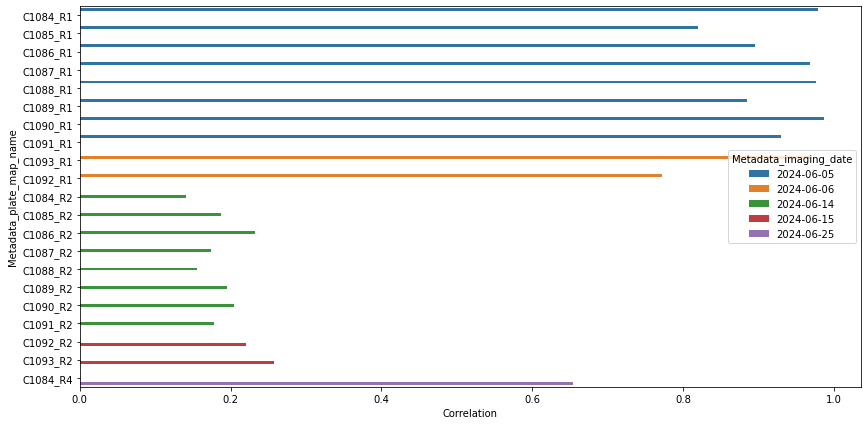

In [185]:
quality_control_2_df.sort_values(by='Metadata_imaging_date')

plt.figure(figsize=(14, 7))

sns.barplot(quality_control_2_df, x="Correlation", y="Metadata_plate_map_name", hue="Metadata_imaging_date")

In [ ]:
# TODO: Compute reference profile for each source